In [1]:
import skimage

image = skimage.io.imread("./data/database/ball_1.jpg")

image = skimage.color.rgb2gray(image)
image = skimage.img_as_ubyte(image)
image

array([[114, 114, 113, ...,  98,  98,  98],
       [119, 118, 117, ...,  98,  98,  98],
       [123, 122, 120, ...,  97,  97,  97],
       ...,
       [ 27,  18,  30, ...,  32,  27,  62],
       [ 21,  11,  25, ...,  43,  46,  98],
       [ 16,  16,  21, ...,  33, 115, 134]], dtype=uint8)

In [2]:
co_occurrence_matrix = skimage.feature.graycomatrix(
    image=image,
    distances=[1],
    angles=[0],
    levels=256,
    symmetric=False,
    normed=False,
).squeeze()
co_occurrence_matrix

array([[  0,   0,   0, ...,   0,   0,   1],
       [  1,   1,   0, ...,   0,   1,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 196,  38,   4],
       [  0,   0,   0, ...,  48, 314,  13],
       [  0,   0,   0, ...,   3,  17,  45]], dtype=uint32)

In [3]:
local_binary_patterns = skimage.feature.local_binary_pattern(
    image=image,
    P=8,
    R=1,
    method="default",
)
local_binary_patterns

array([[193., 240., 241., ..., 241., 241., 112.],
       [192., 240., 240., ...,  31.,  31.,  28.],
       [ 64., 112., 240., ..., 255., 255., 124.],
       ...,
       [  4., 191.,   0., ..., 206., 255.,  68.],
       [  4., 255.,   4., ..., 129., 227.,  96.],
       [  5.,  27.,   4., ...,  31.,   1.,   0.]])

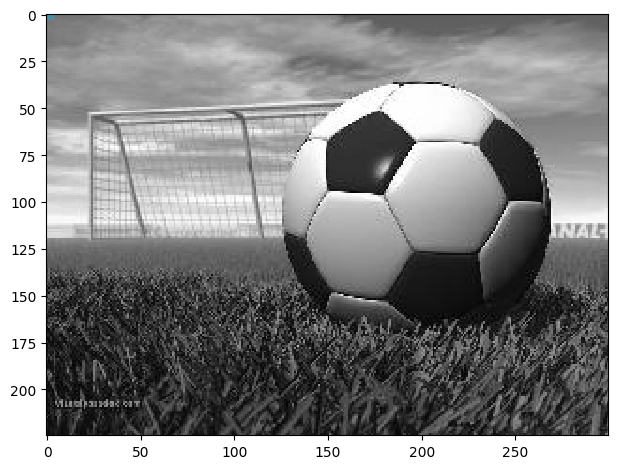

In [4]:
multiblock_lbp = skimage.feature.draw_multiblock_lbp(
    image=image,
    r=1,
    c=1,
    alpha=0.5,
    height=1,
    width=1,
)
skimage.io.imshow(multiblock_lbp)

c:\Users\nicol\AppData\Local\pypoetry\Cache\virtualenvs\tp1-WN64-mr7-py3.12\Lib\site-packages\skimage\feature\texture.py:353: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(


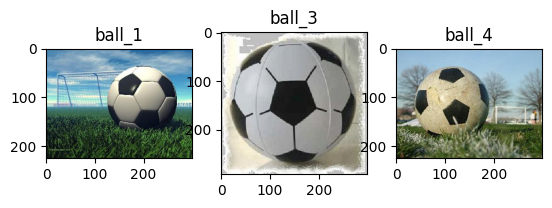

Similarity between Image 1 and Image 2: 0.03439351946787046
Similarity between Image 1 and Image 3: 0.009792881291077424


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, feature
from skimage.transform import resize
from skimage.measure import regionprops
from skimage import img_as_ubyte
from skimage import img_as_float


def extract_features(image):
    gray_image = color.rgb2gray(image)
    lbp = feature.local_binary_pattern(gray_image, P=8, R=1, method="uniform")
    hist, _ = np.histogram(lbp, bins=np.arange(0, 10), density=True)

    return hist


# using Chi-Square distance
def calculate_similarity(hist1, hist2):
    return np.sum((hist1 - hist2) ** 2 / (hist1 + hist2 + 1e-10))


image1 = io.imread("./data/database/ball_1.jpg")
image2 = io.imread("./data/database/ball_3.jpg")
image3 = io.imread("./data/database/ball_4.jpg")

features_image1 = extract_features(image1)
features_image2 = extract_features(image2)
features_image3 = extract_features(image3)

similarity_image1_image2 = calculate_similarity(features_image1, features_image2)
similarity_image1_image3 = calculate_similarity(features_image1, features_image3)

plt.subplot(131)
plt.imshow(image1)
plt.title("ball_1")

plt.subplot(132)
plt.imshow(image2)
plt.title("ball_3")

plt.subplot(133)
plt.imshow(image3)
plt.title("ball_4")

plt.show()

print(f"Similarity between Image 1 and Image 2: {similarity_image1_image2}")
print(f"Similarity between Image 1 and Image 3: {similarity_image1_image3}")